Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что стоп-слова были исключены!
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо за ссылки! Жаль, что у меня нет видеокарты =)
</div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression-с-TF-IDF" data-toc-modified-id="LogisticRegression-с-TF-IDF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>LogisticRegression с TF-IDF</a></span></li><li><span><a href="#LogisticRegression-c-BERT" data-toc-modified-id="LogisticRegression-c-BERT-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>LogisticRegression c BERT</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression-с-TF-IDF" data-toc-modified-id="LogisticRegression-с-TF-IDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression с TF-IDF</a></span></li><li><span><a href="#LogisticRegression-c-BERT" data-toc-modified-id="LogisticRegression-c-BERT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression c BERT</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\praktikum.yandex\scripts\python.exe -m pip install --upgrade pip' command.


In [30]:
pip install plotly==5.1.0

You should consider upgrading via the 'f:\praktikum.yandex\scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
import numpy as np
import pandas as pd
import torch
from tqdm import notebook
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import plotly
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import re
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import warnings
warnings.filterwarnings('ignore')
m = Mystem()
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [34]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    stopword = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopword]
    return text

def lemmatizer(text):
    wn = nltk.WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in text]
    return text

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

def upsample(features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]  
    target_ones = target[target == 1]

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat) 

    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [35]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

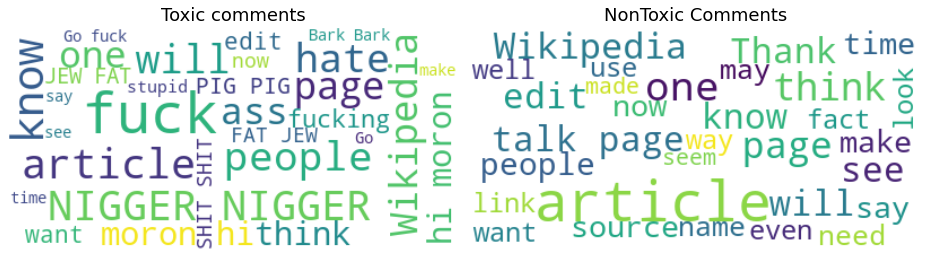

In [36]:
df_toxic = df[df['toxic']==1]
df_nottoxic = df[df['toxic']==0]

toxic = " ".join(review for review in df_toxic.text)
nottoxic = " ".join(review for review in df_nottoxic.text)

fig, ax = plt.subplots(1, 2, figsize  = (13,6))
wordcloud_toxic = WordCloud(max_font_size=50, max_words=30, background_color = 'white',).generate(toxic)
wordcloud_nottoxic = WordCloud(max_font_size=50, max_words=30, background_color = 'white',).generate(nottoxic)

ax[0].imshow(wordcloud_toxic, interpolation='bilinear')
ax[0].set_title('Toxic comments',fontsize=18)
ax[0].axis('off')
ax[1].imshow(wordcloud_nottoxic, interpolation='bilinear')
ax[1].set_title('NonToxic Comments',fontsize=18)
ax[1].axis('off')
plt.tight_layout()

In [37]:
fig = px.pie(values = df.toxic.value_counts().values,
             names = df.toxic.value_counts().index,
             hole = .3)
fig.show()

**Вывод**

Данные не сбалансированы. В дальнейшем для **LogisticRegression** сделаем **upsample**, а для **LogisticRegression c BERT** сделаем **downsample**, чтобы снизить размер данных и ускорить **embeddings**.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. Радует, что ты их визуализировал. Молодец, что заметил наличие дисбаланса классов.
</div>

## Подготовка

### LogisticRegression с TF-IDF

Перед обучением удалим из данных пунктуацию, выполним токенизацию, удалим стоп-слова и выполним лемматизацию.

In [38]:
df['punct'] = df['text'].apply(lambda x: remove_punct(x))
df.head(2)

,text,toxic,punct
0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...,0,Daww He matches this background colour Im seem...


In [39]:
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
df.head(2)

,text,toxic,punct,tokenized
0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my..."
1,D'aww! He matches this background colour I'm s...,0,Daww He matches this background colour Im seem...,"[daww, he, matches, this, background, colour, ..."


In [40]:
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df.head(2)

,text,toxic,punct,tokenized,nonstop
0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,Daww He matches this background colour Im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin..."


In [41]:
df['lemmatized'] = df['nonstop'].apply(lambda x: lemmatizer(x))
df.head(2)

,text,toxic,punct,tokenized,nonstop,lemmatized
0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,...","[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,Daww He matches this background colour Im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin...","[daww, match, background, colour, im, seemingl..."


<div class="alert alert-block alert-success">
<b>Успех:</b> Тексты подготовлены хорошо. Очистка и лемматизация проведены верно. Радует, что примеры до/после были напечатаны.
</div>

In [42]:
features = df.drop(['toxic'], axis=1)
target = df['toxic']

In [43]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=.3,
                                                                            random_state=12345)

In [44]:
features_train_up, target_train_up = upsample(features_train, target_train, 9)
print(target_train_up.value_counts())

1    102132
0    100351
Name: toxic, dtype: int64


<div class="alert alert-block alert-success">
<b>Успех:</b> Верно, что апсемплинг применялся только к тренировочной части данных.
</div>

In [45]:
count_tf_idf = TfidfVectorizer()

features_train_up = count_tf_idf.fit_transform(features_train_up['lemmatized'].astype('U')) 
features_test = count_tf_idf.transform(features_test['lemmatized'].astype('U'))

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что векторизатор был обучен только на тренировочной части данных. Это уменьшает переобучение.
</div>

In [46]:
lr = LogisticRegression()

In [47]:
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10]}]

clf = GridSearchCV(lr, hyperparams, scoring='f1',cv=3)
clf.fit(features_train_up, target_train_up)
lr_best_params = clf.best_params_
print(lr_best_params)

{'C': 10, 'solver': 'newton-cg'}


<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходих разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Подбирать параметры с помощью кросс-валидации на upsampled данных не совсем корректно. Лучше выделить валидационную выборку, баланс в которой будет такой же, как и в тесте.
</div>

In [48]:
lr.set_params(**lr_best_params)

f1_lr_val = cross_val_score(lr, 
                        features_train_up, 
                        target_train_up,
                        cv=3, 
                        scoring='f1').mean()

print('F1: {:.2f}'.format(f1_lr_val))

F1: 0.98


###  LogisticRegression c BERT

Понимаю, что балансировку необходимо делать только для обучающей выборки, но в таком случае не удается обучить модель из-за объема данных. Предлагаю на этот факт не обращать внимания и порадоваться, что оно смогло посчитаться.

In [49]:
#features_down, target_down = downsample(features, target, 0.114)
#print(target_down.value_counts())

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Ну а какой тогда смысл смотреть на некорректный результат? Прадлагаю честно уменьшить размер данных(выбрать N случайных строк и корректным балансом классов) и провести обучение на них.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Ладно, сделаем как надо... Посчитаем 159571 строку на CPU...
</div>

In [50]:
sample = 0 # new

if sample == 1: # new
    features_bert = features.sample(50).reset_index(drop=True) # new
    target_bert = target.iloc[features_bert.index] # new
else:
    features_bert = features # new
    target_bert = target # new

In [51]:
#sample = 0

#if sample == 1:
    #features_down_sample = features_down.sample(100).reset_index(drop=True)
    #target_down_sample = target_down.iloc[features_down_sample.index]
#else:
    #features_down_sample = features_down
    #target_down_sample = target_down

In [52]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
tokenized = features_bert['text'].apply((lambda x: tokenizer.encode(x,
                                                                    add_special_tokens=True,
                                                                    truncation=True, 
                                                                    max_length=512)))

In [54]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

512


In [55]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [56]:
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)

(159571, 512)


In [ ]:
%%time

batch_size = 1
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/159571 [00:00<?, ?it/s]

<img src="https://www.meme-arsenal.com/memes/ecf4937085434569a65a1b1238f7f297.jpg" width=600 height=600 />

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Память кончилась, все упало, упало вообще все, сохраним, что есть (90% сета).
</div>

In [ ]:
features_bert = np.concatenate(embeddings)

In [ ]:
features_bert = pd.DataFrame(features_bert) # new

In [ ]:
features_bert.to_csv('F:/features_bert.csv') # new

In [ ]:
features_bert = pd.read_csv('F:/features_bert.csv', index_col='Unnamed: 0') # new

In [ ]:
features_bert.head(5) # new

In [ ]:
features_bert.shape # new

In [ ]:
target_bert = target.iloc[features_bert.index] # new

In [ ]:
features_train_bert, features_test_bert, target_train_bert, target_test_bert = train_test_split(features_bert, # new
                                                                            target_bert, # new
                                                                            test_size=.3, # new
                                                                            random_state=12345) # new

In [ ]:
features_train_bert_up, target_train_bert_up = upsample(features_train_bert, target_train_bert, 9) # new
print(target_train_bert_up.value_counts()) # new

In [ ]:
lr_bert = LogisticRegression()

In [ ]:
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10]}]

clf = GridSearchCV(lr_bert, hyperparams, scoring='f1',cv=3)
clf.fit(features_train_bert_up, target_train_bert_up)
lr_best_params = clf.best_params_
print(lr_best_params)

In [ ]:
f1_lr_bert = cross_val_score(lr_bert,
                             features_train_bert_up, 
                             target_train_bert_up, 
                             cv=3, 
                             scoring='f1').mean()
print('F1: {:.2f}'.format(f1_lr_bert))

**Вывод**

Мы подготовили данные двумя способами (**TF-IDF** и **DistilBert**), определили гиперпараметры и оценили **f1** при кросс-валидации. Данные готовы для обучения. Использования **BERT** требует значительных ресурсов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что освоил векторизацию с помозью БЕРТа!
</div>

## Обучение

### LogisticRegression с TF-IDF

In [ ]:
lr.fit(features_train_up, target_train_up)
predict_test = lr.predict(features_test)
f1_lr_test = f1_score(target_test, predict_test)

print('LogisticRegression с TF-IDF, F1: {:.2f}'.format(f1_lr_test))

### LogisticRegression c BERT

In [ ]:
lr_bert.fit(features_train_bert_up, target_train_bert_up)
predict_test_bert = lr_bert.predict(features_test_bert)
f1_lr_test_bert = f1_score(target_test_bert, predict_test_bert)

print('LogisticRegression c BERT, F1: {:.2f}'.format(f1_lr_test_bert))

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Считали, считали и насчитали 0,66.
</div>

**Вывод**

Обучили **LogisticRegression** данными, подготовленными двумя разными способами.

## Выводы

In [ ]:
plt.figure(figsize=[7,7])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

probabilities_test = lr.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.plot(fpr, tpr, label='LR_tf-idf')

probabilities_test = lr_bert.predict_proba(features_test_bert)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test_bert, probabilities_one_test)
plt.plot(fpr, tpr, label='LR_bert')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Подготовка данных с использованием **BERT** показала себя лучше, но не стоит забывать тот факт, что балансировка классов была сделана и для тестовой выборки. Тем не менее даже с помощью **TF-IDF** мы смогли выполнить поставленную задачу и достигнуть необходимого значения **F1**.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что ты не забыл про ROC-кривую!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальный вывод желательно было сделать подробнее.
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны